<a href="https://colab.research.google.com/github/puja431996/Notebook/blob/master/COVID_19_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

---



In [0]:
# import keras
import tensorflow as tf
from zipfile import ZipFile
from matplotlib import pyplot as plt
import cv2

import numpy as np
from numpy import expand_dims
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras import layers 
#from keras.applications import VGG16 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

#Mount Drive

---



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cd drive && cd 'My Drive' && cd COVID_19 && cd xray_augmented_mendley && ls

Dataset_All_Augmented.zip


In [0]:
!cd 'Dataset All Augmented' && ls

/bin/bash: line 0: cd: Dataset All Augmented: No such file or directory


#UnZip Dataset

---



In [0]:

file_name = "/content/drive/My Drive/COVID_19/xray_augmented_mendley/Dataset_All_Augmented.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Dataset All Augmented/                         2020-03-26 09:56:58            0
Dataset All Augmented/COVID-19/                2020-03-26 12:01:12            0
Dataset All Augmented/COVID-19/COVID-19 (1).jpeg 2020-03-26 12:00:24        60413
Dataset All Augmented/COVID-19/COVID-19 (1).jpg 2020-03-26 11:59:26        37991
Dataset All Augmented/COVID-19/COVID-19 (1).png 2020-03-26 11:59:36       319354
Dataset All Augmented/COVID-19/COVID-19 (10).jpeg 2020-03-26 12:00:14        57880
Dataset All Augmented/COVID-19/COVID-19 (10).jpg 2020-03-26 11:59:52        37923
Dataset All Augmented/COVID-19/COVID-19 (100).jpg 2020-03-26 12:00:18        41188
Dataset All Augmented/COVID-19/COVID-19 (101).jpg 2020-03-26 12:00:18        41749
Dataset All Augmented/COVID-19/COVID-19 (102).jpg 2020-03-26 12:00:20        41693
Dataset All Augmented/COVID-19/COVID-19 (103).jpg 2020-03-26 12:00:20        41366
Dataset All Augment

In [0]:
ls

'Dataset All Augmented'/   drive/   sample_data/


In [0]:
!cd 'Dataset All Augmented' && ls

COVID-19  Non-COVID-19


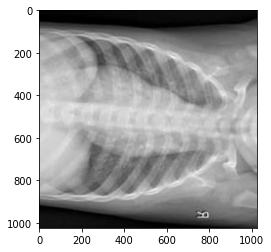

In [0]:
image = cv2.imread('Dataset All Augmented/Non-COVID-19/Non-COVID-19 (347).jpg')
plt.imshow(image)

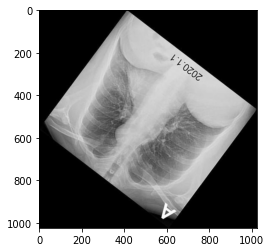

In [0]:
plt.imshow(cv2.imread('Dataset All Augmented/COVID-19/COVID-19 (651).jpg'))

#Preprocessing Image

---



###Images in each folder

---



Total No of data present in each folder 

COVID-19:912
Non-COVID-19:912


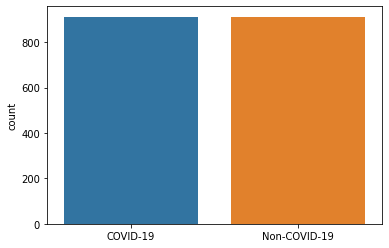

In [0]:

counts = []
dir = 'Dataset All Augmented'
print("Total No of data present in each folder \n")
for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        list1 = os.listdir(path) 
        number_files = len(list1)
        counts = counts + [filename]*number_files
        print (filename + ":"+ str(number_files))

sns.countplot(counts)

###Image Generator

---



In [0]:
train_data_dir = 'Dataset All Augmented/'
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
    
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    subset='validation',
    shuffle=False) 

Found 1460 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'COVID-19': 0, 'Non-COVID-19': 1}

#Model Build 



###Model

---



In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
    # The second convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
    # The third convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
    # The fourth convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
    # The fifth convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

    # Flatten the results to feed into a DNN
model.add(layers.Flatten())
    # 512 neuron hidden layer
model.add(Dense(512, activation='relu'))
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('covid-19') and 1 for the other ('non covid-19')
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)       

###Model compile

---



In [0]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import CSVLogger,EarlyStopping
csv_logger = CSVLogger('COVID_19_Basic.csv', append=False, separator=';')
ES = EarlyStopping(monitor='val_accuracy', mode='auto', patience=3)

###Fit Model

---



In [0]:
history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch=46,epochs = 10,  callbacks=[csv_logger , ES] ,  verbose = 1)

Epoch 1/10
46/46 [==============================] - 10s 227ms/step - loss: 0.6370 - accuracy: 0.6404 - val_loss: 0.1175 - val_accuracy: 0.6923
Epoch 2/10
46/46 [==============================] - 9s 188ms/step - loss: 0.3265 - accuracy: 0.8726 - val_loss: 8.7146e-05 - val_accuracy: 0.8104
Epoch 3/10
46/46 [==============================] - 9s 188ms/step - loss: 0.1540 - accuracy: 0.9507 - val_loss: 2.8602e-07 - val_accuracy: 0.9451
Epoch 4/10
46/46 [==============================] - 9s 186ms/step - loss: 0.0945 - accuracy: 0.9726 - val_loss: 8.8150e-09 - val_accuracy: 0.9313
Epoch 5/10
46/46 [==============================] - 9s 190ms/step - loss: 0.0797 - accuracy: 0.9774 - val_loss: 0.0019 - val_accuracy: 0.8599
Epoch 6/10
46/46 [==============================] - 9s 191ms/step - loss: 0.0576 - accuracy: 0.9808 - val_loss: 3.8194e-08 - val_accuracy: 0.9505
Epoch 7/10
46/46 [==============================] - 9s 188ms/step - loss: 0.0627 - accuracy: 0.9767 - val_loss: 3.5380e-08 - val_ac

###Save Model

---



In [0]:
model.save('/content/drive/My Drive/saved_models/COVID_19_Basic.h5')

###Plot Acc and Loss

---



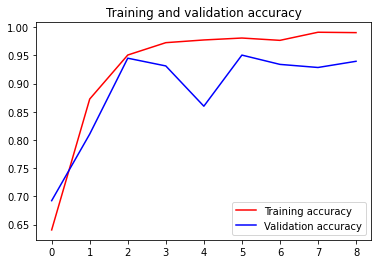

<Figure size 432x288 with 0 Axes>

In [0]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

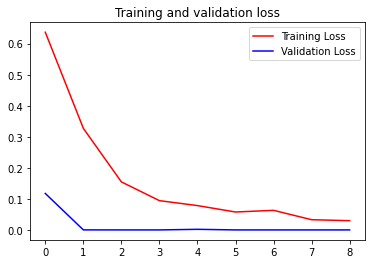

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

###Confusion Matrix

---



In [0]:
validation_generator.reset()
Y_preds=model.predict_generator(validation_generator)
# print(Y_preds)

y_preds = [i[0] for i in Y_preds]
y_pred = []
for v in y_preds:
  if v <=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

# y_pred = np.argmax(Y_preds, axis=1)
Matrix = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(Matrix)
print('Classification Report')
target_names = ['COVID-19', 'Normal']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[181   1]
 [ 21 161]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.90      0.99      0.94       182
      Normal       0.99      0.88      0.94       182

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



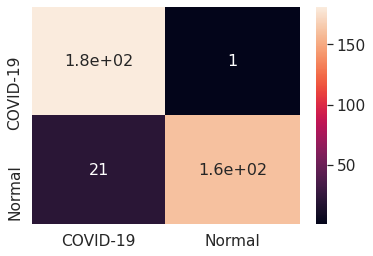

In [0]:
df_cm = pd.DataFrame(Matrix, target_names, target_names)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

#Testing

---



In [0]:
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)/255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<=0.5:
    print(fn + " is a covid +")
  else:
    print(fn + " is a covid -")
 

Saving c6.jpg to c6 (2).jpg
[0.00083251]
c6.jpg is a covid +


###Download csv

---



In [0]:
from google.colab import files
files.download('COVID_19_Basic.csv')